# Install Dependencies

In [1]:
# !pip install hypergraphx

# Import/Config

In [2]:
import sys
import json

from hypergraphx.generation.scale_free import scale_free_hypergraph
from hypergraphx.linalg import *
from hypergraphx.representations.projections import bipartite_projection, clique_projection
from hypergraphx.generation.random import *
from hypergraphx.readwrite.save import save_hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph

# Undirected Hypergraph

## Undirected Hypergraph instantiation

In [3]:
H = Hypergraph(
    [(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)],
    weighted=True,
    weights=[1, 2, 3, 4, 5]
)
print(H)

Hypergraph with 8 nodes and 5 edges.
Distribution of hyperedge sizes: {2: 3, 4: 1, 3: 1}


## Accessing hypergraph metadata

### Accessing edge data

In [4]:
def print_edge_metadata(g):
  clean_dict = {
      str(k): v
      for k, v in g.get_edges(metadata=True).items()
  }
  print(json.dumps(clean_dict, indent=4))

In [5]:
print_edge_metadata(H)

{
    "(1, 3)": {},
    "(1, 4)": {},
    "(1, 2)": {},
    "(5, 6, 7, 8)": {},
    "(1, 2, 3)": {}
}


In [6]:
print("H edges:")
for edge, edge_idx in H:
    print(f"\t{edge} has index {edge_idx}")

H edges:
	(1, 3) has index 0
	(1, 4) has index 1
	(1, 2) has index 2
	(5, 6, 7, 8) has index 3
	(1, 2, 3) has index 4


### Accessing edge weights

In [7]:
print(f"H weights: {H.get_weights()}")
print(f"Weight of (1, 2, 3): {H.get_weight((1, 2, 3))}")
print(f"Weight of (2, 3, 1): {H.get_weight((2, 3, 1))}")

H weights: [1, 2, 3, 4, 5]
Weight of (1, 2, 3): 5
Weight of (2, 3, 1): 5


### Accessing node data

In [8]:
print(f"H nodes: {H.get_nodes(metadata=True)}")

H nodes: {1: {}, 3: {}, 4: {}, 2: {}, 5: {}, 6: {}, 7: {}, 8: {}}


### Other graph metadata

In [9]:
print(f"H is connected: {H.is_connected()}")
print(f"H is uniform: {H.is_uniform()}")

H is connected: False
H is uniform: False


## Visualize the undirected hypergraph

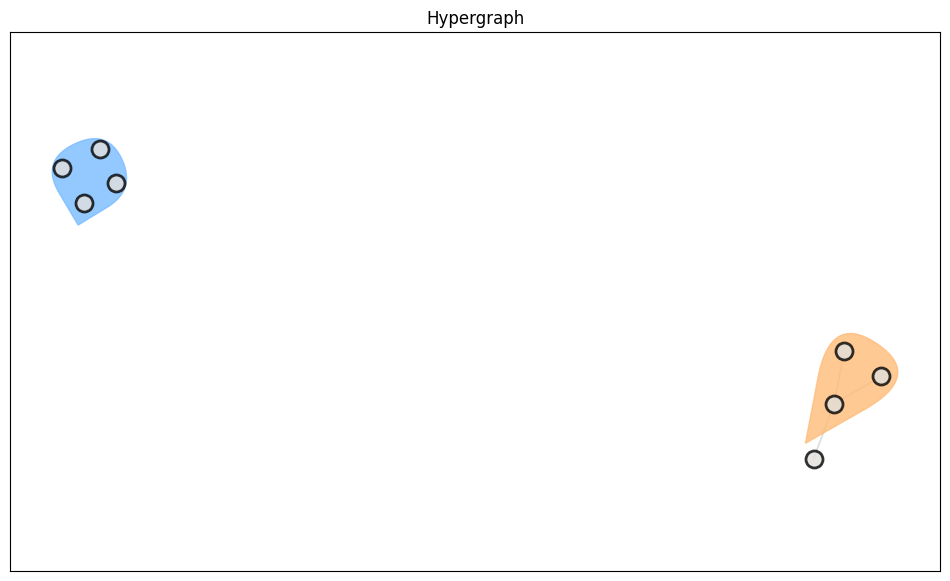

In [10]:
draw_hypergraph(H)

## Try adding/removing edges

### Add edge

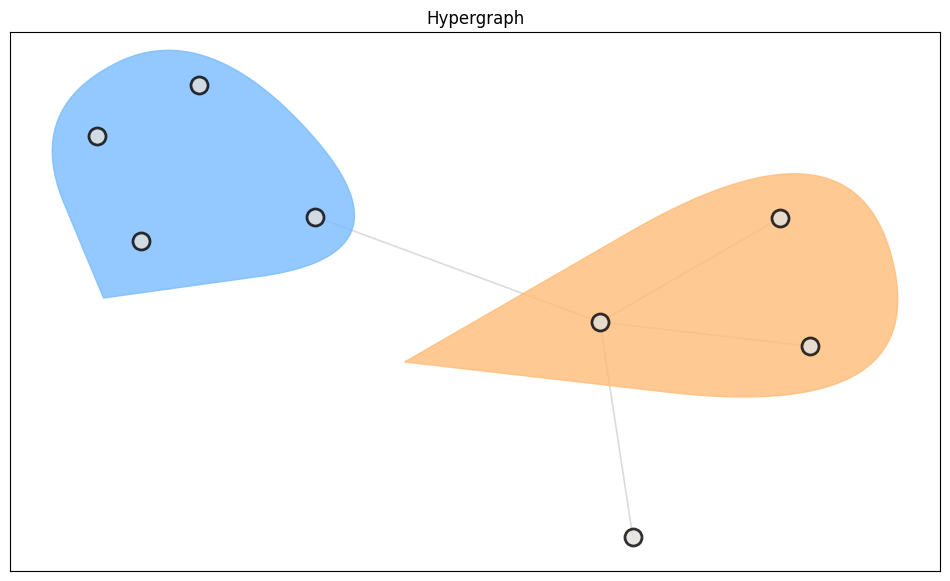

In [11]:
H.add_edge((1,5), weight=10)

draw_hypergraph(H)

### Remove edges

In [12]:
print(f"H has edge (5, 6, 7, 8)?: {H.check_edge((5, 6, 7, 8))}")

H.remove_edge((5, 6, 7, 8))

print(f"H has edge (5, 6, 7, 8) after remove_edge?: {H.check_edge((5, 6, 7, 8))}")

H has edge (5, 6, 7, 8)?: True
H has edge (5, 6, 7, 8) after remove_edge?: False


In [13]:
print("H edges:")
for edge, edge_idx in H:
    print(f"\t{edge} has index {edge_idx}")
print(f"H is uniform: {H.is_uniform()}")

H.remove_edges([(1,2,3), (1,3)])

print("H edges after removing (1,2,3), (1,3):")
for edge, edge_idx in H:
    print(f"\t{edge} has index {edge_idx}")
print(f"H is uniform: {H.is_uniform()}")

H edges:
	(1, 3) has index 0
	(1, 4) has index 1
	(1, 2) has index 2
	(1, 2, 3) has index 4
	(1, 5) has index 5
H is uniform: False
H edges after removing (1,2,3), (1,3):
	(1, 4) has index 1
	(1, 2) has index 2
	(1, 5) has index 5
H is uniform: True


In [14]:
print_edge_metadata(H)

{
    "(1, 4)": {},
    "(1, 2)": {},
    "(1, 5)": {}
}


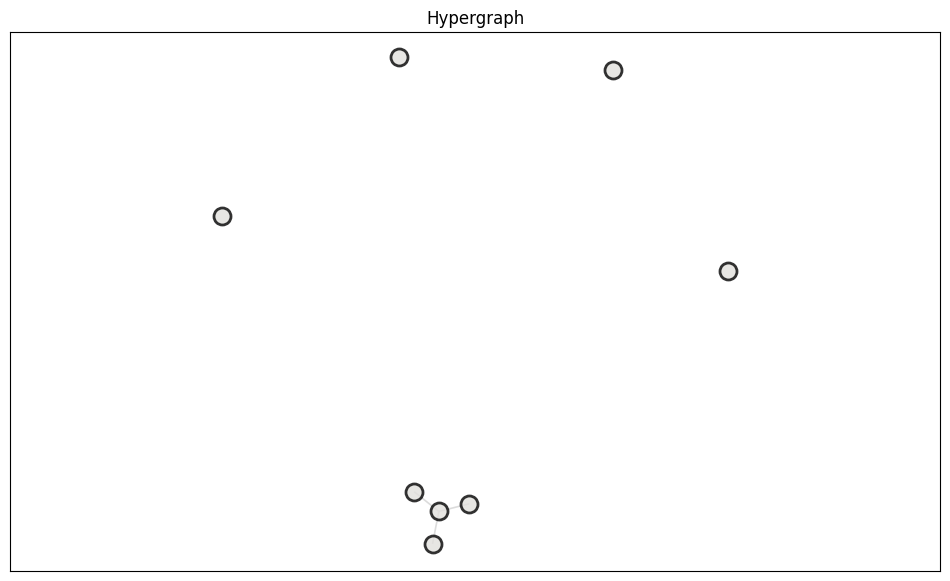

In [15]:
draw_hypergraph(H)

## Try adding/removing nodes

In [16]:
def print_node_metadata(g):
  print(json.dumps(H.get_nodes(metadata=True), indent=4))

In [17]:
print(f"H nodes: {print_node_metadata(H)}")

H.remove_node(1)

print(f"H nodes after removing node 1: {print_node_metadata(H)}")

H.add_node(1)

print(f"H nodes after adding node 1 back in: {print_node_metadata(H)}")

{
    "1": {},
    "3": {},
    "4": {},
    "2": {},
    "5": {},
    "6": {},
    "7": {},
    "8": {}
}
H nodes: None
{
    "3": {},
    "4": {},
    "2": {},
    "5": {},
    "6": {},
    "7": {},
    "8": {}
}
H nodes after removing node 1: None
{
    "3": {},
    "4": {},
    "2": {},
    "5": {},
    "6": {},
    "7": {},
    "8": {},
    "1": {}
}
H nodes after adding node 1 back in: None


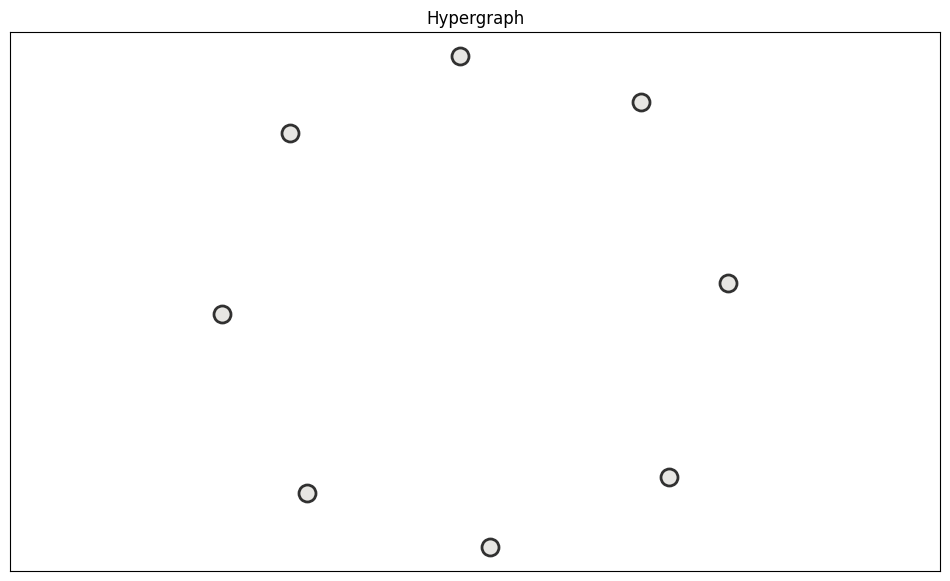

In [18]:
draw_hypergraph(H)

## Try modifying node metadata

In [19]:
H.add_attr_to_node_metadata(1, 'role', 'student')
print_node_metadata(H)

{
    "3": {},
    "4": {},
    "2": {},
    "5": {},
    "6": {},
    "7": {},
    "8": {},
    "1": {
        "role": "student"
    }
}
